In [1]:
#loading the dataset:

import pandas as pd

data=pd.read_excel("ME_F321_dataset/train/labels.xlsx")

data.head()

,Case#,Spacecraft#,Condition,Solenoid valves Opening Ratio /%,Unnamed: 4,Unnamed: 5,Unnamed: 6,Bubble,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1
1,1.0,1.0,Normal,100,100,100,100,No,No,No,No,No,No,No,No
2,2.0,1.0,Normal,100,100,100,100,No,No,No,No,No,No,No,No
3,3.0,1.0,Normal,100,100,100,100,No,No,No,No,No,No,No,No
4,4.0,1.0,Normal,100,100,100,100,No,No,No,No,No,No,No,No


In [2]:
#finding the number of instances for each condition:
data['Condition'].value_counts()

Condition
Normal     105
Fault       48
Anomaly     24
Name: count, dtype: int64

C:\Users\samar\AppData\Local\Temp\ipykernel_6860\3311182139.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


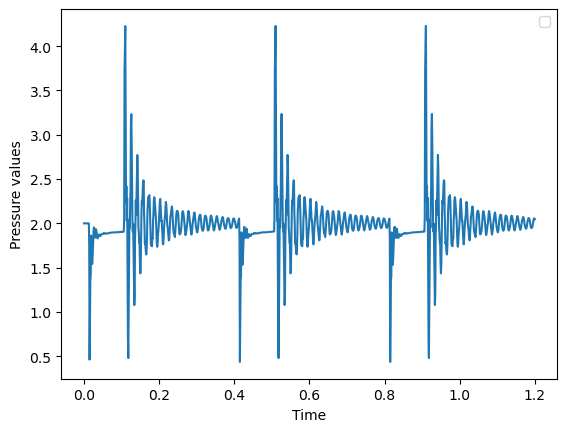

In [3]:
#hypothesis check through visualization:
#logic: to select one instance each from normal, anomaly and fault and see their time series plots
#normal: Case001.csv
#anomaly: Case170.csv
#fault: Case124.csv

import matplotlib.pyplot as plt

def load_data(file):
    data=pd.read_csv(f"ME_F321_dataset/train/data/{file}")
    return data

data_normal=load_data("Case001.csv")
data_anomaly=load_data("Case170.csv")
data_fault=load_data("Case124.csv")

#tyring to replicate figure 2 to see if the given data is correct:

'''for i in range(1,8):
    plt.plot(data_normal["TIME"],data_normal[f"P{i}"])
'''
plt.plot(data_normal["TIME"],data_normal["P1"])

plt.xlabel("Time")
plt.ylabel("Pressure values")
plt.legend()
plt.show()



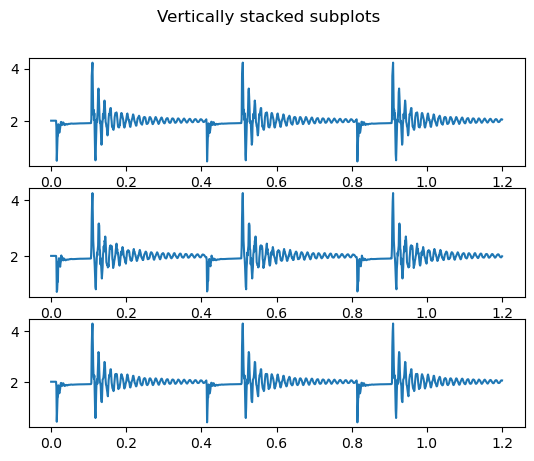

In [4]:
#To compare the three plots-normal, anomaly and fault:

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Vertically stacked subplots')
'''for i in range(1,8):
    ax1.plot(data_anomaly["TIME"],data_anomaly[f"P{i}"])
    ax2.plot(data_fault["TIME"],data_fault[f"P{i}"])
'''
ax1.plot(data_normal["TIME"],data_normal["P1"])
ax2.plot(data_anomaly["TIME"],data_anomaly["P1"])
ax3.plot(data_fault["TIME"],data_fault["P1"])

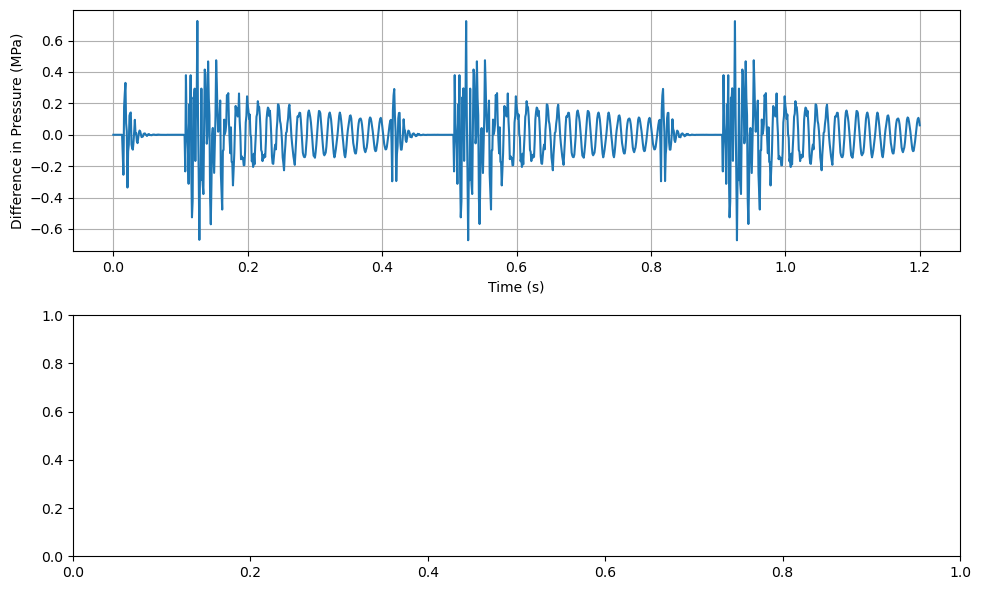

In [12]:
#To see the variations in pressure for the anomaly and fault plots compared to the normal plot:

ffig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6))
fig.suptitle('Vertically stacked subplots showing differences:')

# Top plot
ax1.plot(
    data_normal["TIME"],
    data_normal["P1"] - data_anomaly["P1"]
)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Difference in Pressure (MPa)")
ax1.grid(True)



plt.tight_layout()
plt.show()


